# Übungen zu Teilchenphysik I
## Exercise 05 - Geant4, Part 1
---

The first part of this exercise sheet targets the general workflow understanding of simulation studies. `Exercise 0` provides an overview of the here used methods to access the `geant4_simulation` package which provides a user-friendly and quick frontend to the underlying `Geant4` framework. For any in-depth questions about the presented methods, do not be afraid of checking the `geant4_simulation` code. The rest of the exercises are in the notebook `Exercise05_Part2.ipynb`.

# Exercise 0: Introduction to *python* Workflow with Geant4 <a id="Exercise0"></a>
---

The key aspects of the workflow with Geant4 in pyhton for the following exercise are implemented in the `geant4_simulation` package and made accessible to the user via the `ApplicationManager` class. First, to start the simulating events, the package needs to be loaded and the steering class `ApplicationManager` has to be constructed. For a better understanding of the following procedure, it may be advisable to study the code in `geant4_simulation/__init__.py`.

In [2]:
import geant4_simulation as g4sim
# Create an instance of the ApplicationManager class.
g4 = g4sim.ApplicationManager()


**************************************************************
 Geant4 version Name: geant4-10-06-patch-02    (29-May-2020)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

Visualization Manager instantiating with verbosity "warnings (3)"...


There are three main ingredients to a simulation of the passage of particles through matter using Geant4: The *description of the target*, the *underlying interaction* and the *initial state*.

## 1. Target
The geometrical structure and the compounds of the simulated detector used in the exercises are already provided in the `geant4_simulation` package. Thus, for the exercises it suffices to just load the corresponding geometry with the `set_geometry()` module from the `ApplicationManager` class. All geometries, including their properties and arguments can be looked up in `geant4_simulation/geometry/`.

A simple lead geometry can be loaded from the geometry `pbbox`. As a default, the lead volume is 20 cm long and 10 cm in height and width. You can specify the dimensions with additional arguments of the `pbbox` geometry (dimensions in units of cm) where the second given parameter corresponds to the width and height of the lead volume:

In [3]:
# Set the geometry to example_geometry.
g4.set_geometry('pbbox(2,2)')

The `pbbox` geometry creates a volume of lead as a default, but you can also switch the material to iron:
```python
g4.change_material("Fe")
```
This method will change the material from the previous material to the material given as an argument. Currently, only iron and lead are supported as materials.

## 2. Underlying Interaction

The second main ingredient of a simulation with Geant4 is the physics list. It specifies all particles and interactions considered in the simulation. It is mandatory for all simulations. While the Geant4 collaboration provides a vast amount of different lists which are useful for various applications, most experiments decide to define a specialised list for their own needs (like target properties, particle energies, physics needs,...). 

You do not need to modify any of the physics lists. For the first exercise, we will use a physics list that only defines electromagnetic interactions of the involved particles. Additional lists can be found in `geant4_simulation/physicsList/src/`.

In [4]:
# Set the physics list used during the simulation.
g4.set_physics_list('EMPhysics')

After the used detector geometry and physics lists are defined, the Geant4 kernel can be initialized. Note that the geometry may be changed after the initialization of the kernel whereas the physics lists can only be changed before calling the `initialize()` method. To enable the changes in the geometry the `initialize()` method needs to be invoked.

In [5]:
# Initialize the Geant4 kernel.
g4.initialize()

<<< Geant4 Physics List simulation engine: EMPhysics



## 3. Initial State

Lastly, the third ingredient of the simulation is the specification of the incoming particles that hit the detector during the simulation. Throughout the exercises, we will use varying single incident particles with specified incoming energies. The type of the primary particle can be set using the MC Particle Numbering scheme defined by the Particle Data Group ([PDG](https://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-numbering.pdf)) of the requested particle.

To define the incoming particle use the `set_particle(Particle)` method of the steering class. Here, `Particle` can be any Geant4 accepted value - for this exercise the integer PDG code of a particle suffices. The initial energy of the particle can be set by the `set_energy(Value)` method where `Value` defines the energy in GeV.

In [8]:
# Set the primary particle used in the simulation.
g4.set_particle(22) # 22 = photon
g4.set_energy(0.001)  # 1 MeV initial energy.

After defining all necessary input parameters of the simulation, the simulation can be started using the `start_run()` method. You can specify, the number of simulated events you want to produce and whether the simulated events should be visualized using the `numberOfEvents` and `visualize` keyword arguments, respectively. The default number of simulated events is 1 and by default the visualization of the event is disabled. The first invocation of the `start_run()` method will produce a large list of all defined physical processes in the physics list and the parameters of the corresponding processes.

Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


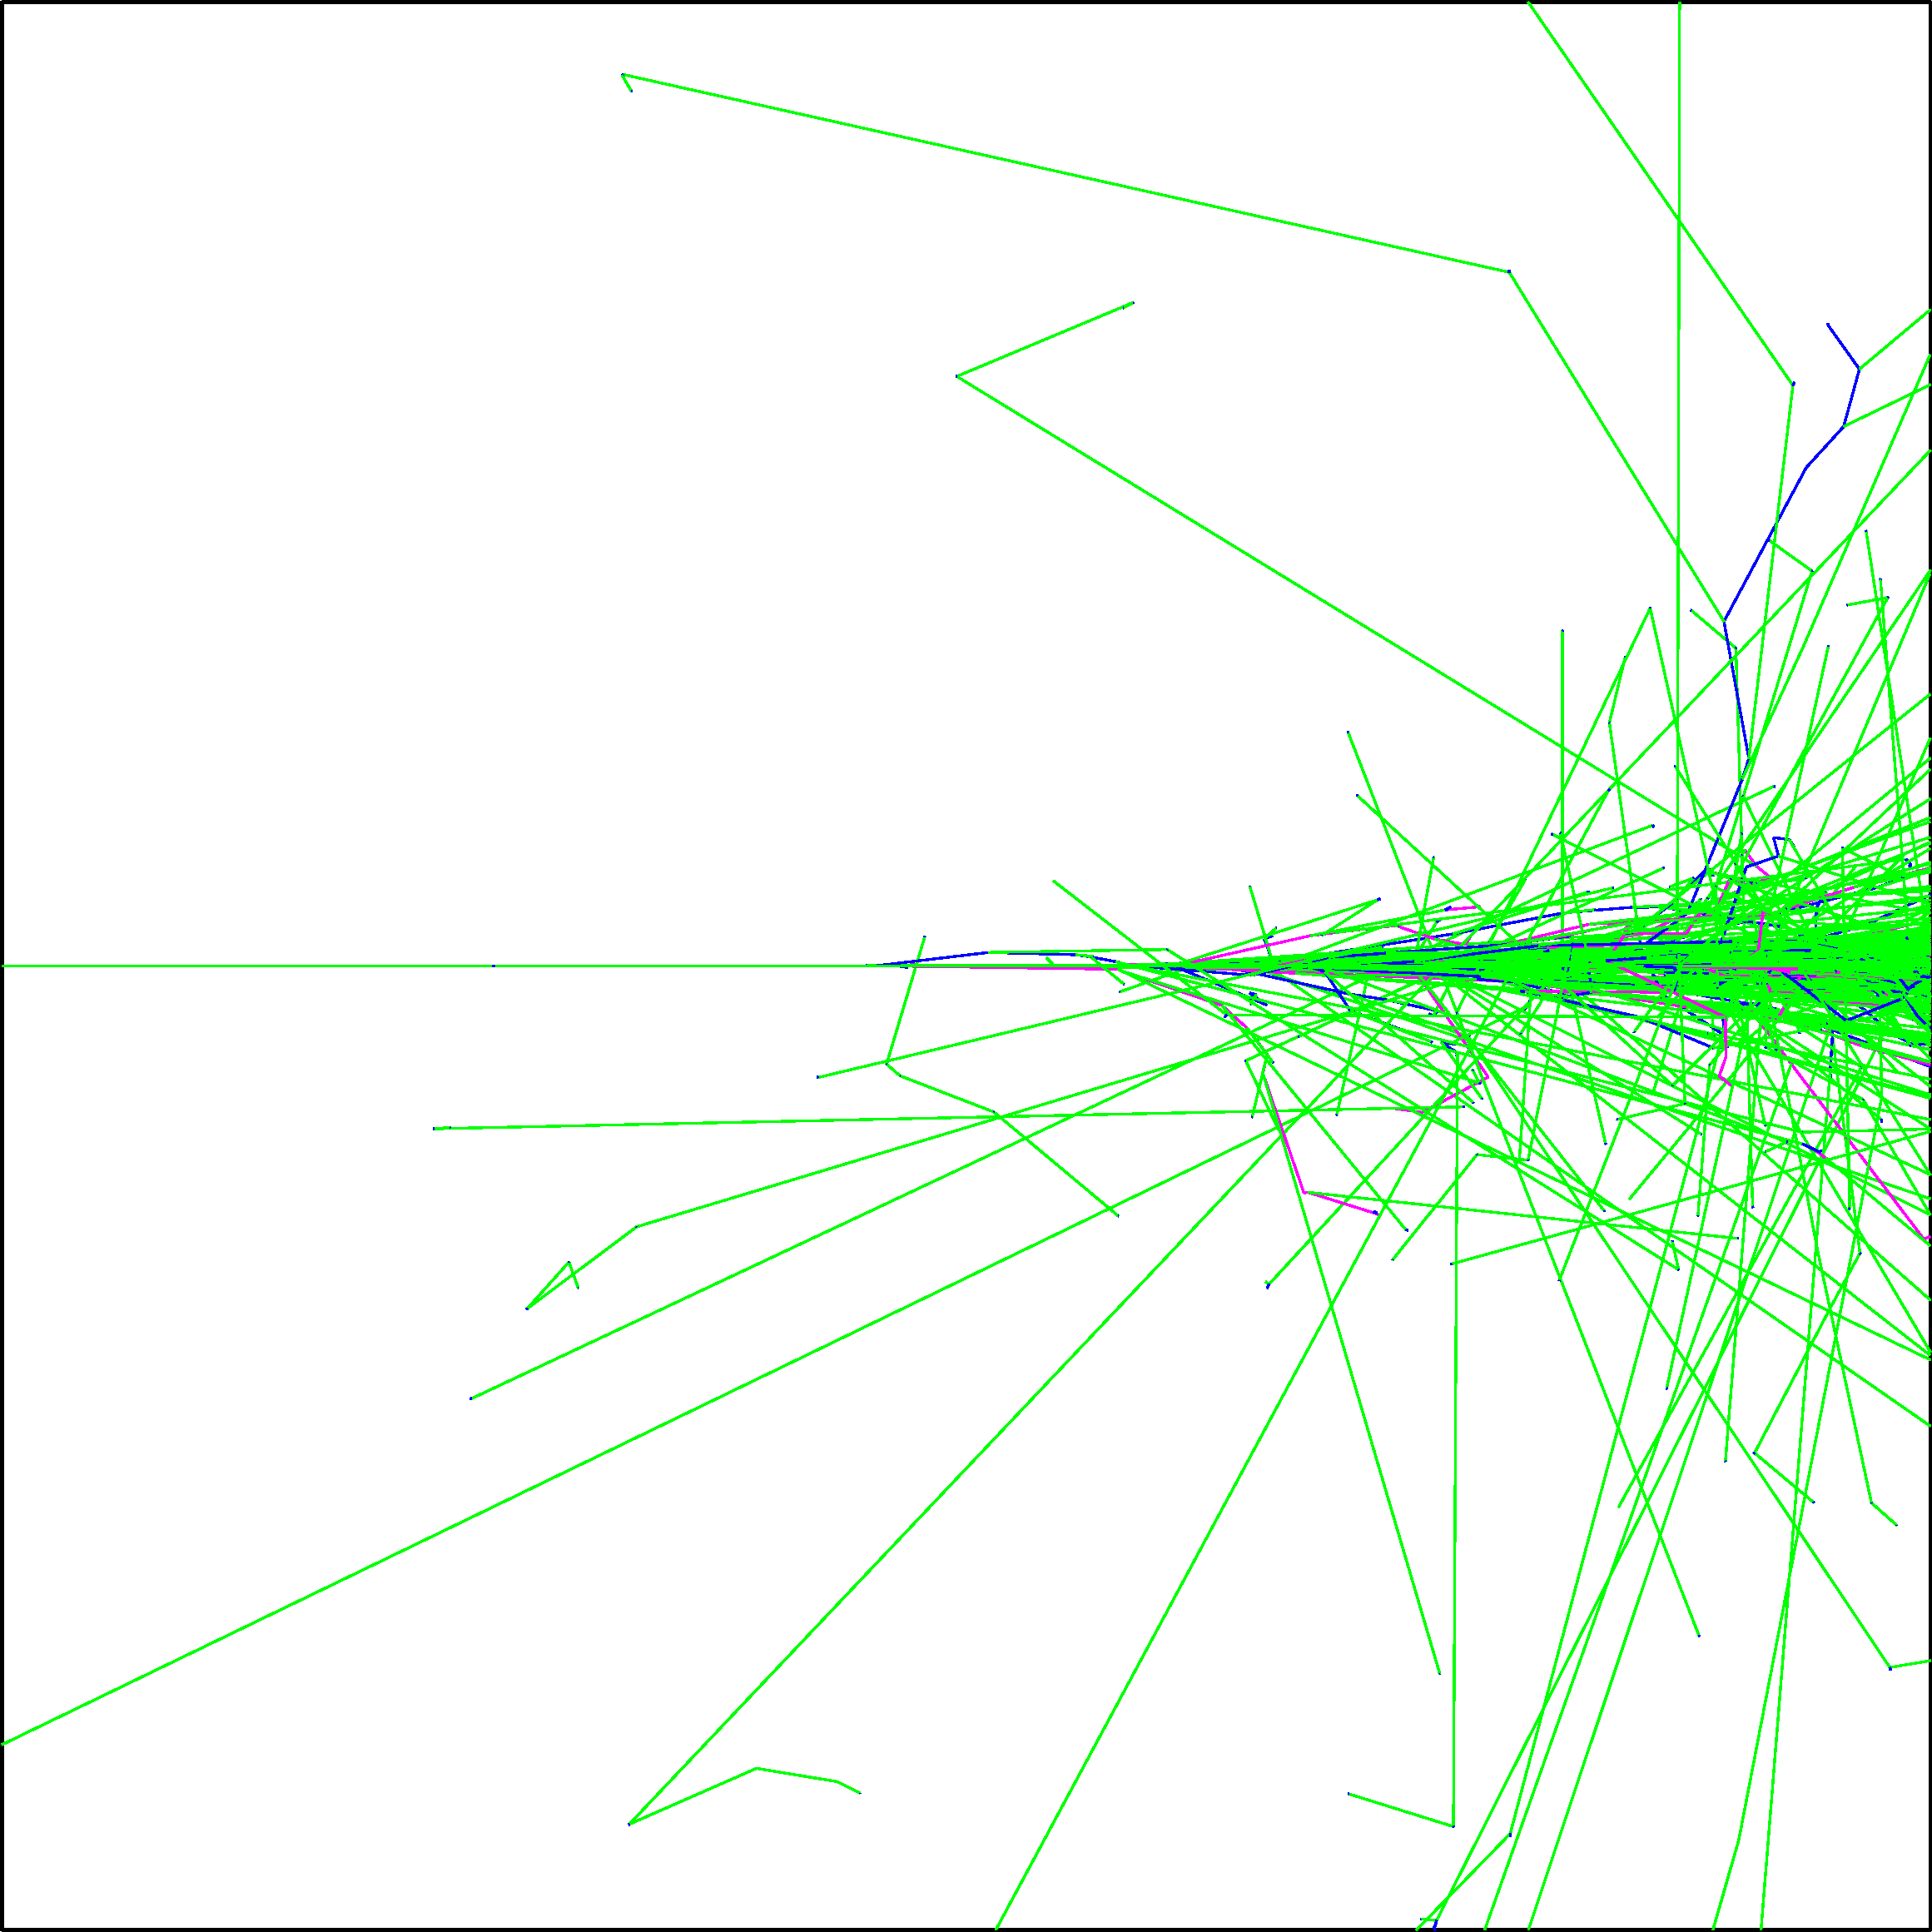

In [9]:
g4.start_run()

## 4. Visualization

As a first, purely qualitative step, study visually the interaction of photons with a $(2\times 2\times 2)\,$cm lead block. For this pupose, start runs at energies in the $\mathcal{0}(1\,\textrm{MeV}), \mathcal{0}(10\,\textrm{MeV}), \mathcal{0}(100\,\textrm{MeV}), \mathcal{0}(1\,\textrm{GeV}), \mathcal{0}(10\,\textrm{GeV})$ spectrum and try to identify all the different interactions.

**Hint:** To get a graphical representation of the simulation you have to explicitly set the corresponding option `visualize=True` when calling the `start_run()` method. To determine the type of process, the charges of the participating particles can be analysed. The colours of the tracks in the event display tell you the charge of the corresponding particle
* photon: green
* electron: blue
* positron: magenta

<div class="alert alert-info">
<strong>Question:</strong> 
What processes can you observe? Do the rates of the occurring processes change at different energies? 
</div>

<div class="alert alert-success">
<strong>Answer:</strong> 
Your answer...
</div>

/tracking/storeTrajectory 2
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.
Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_

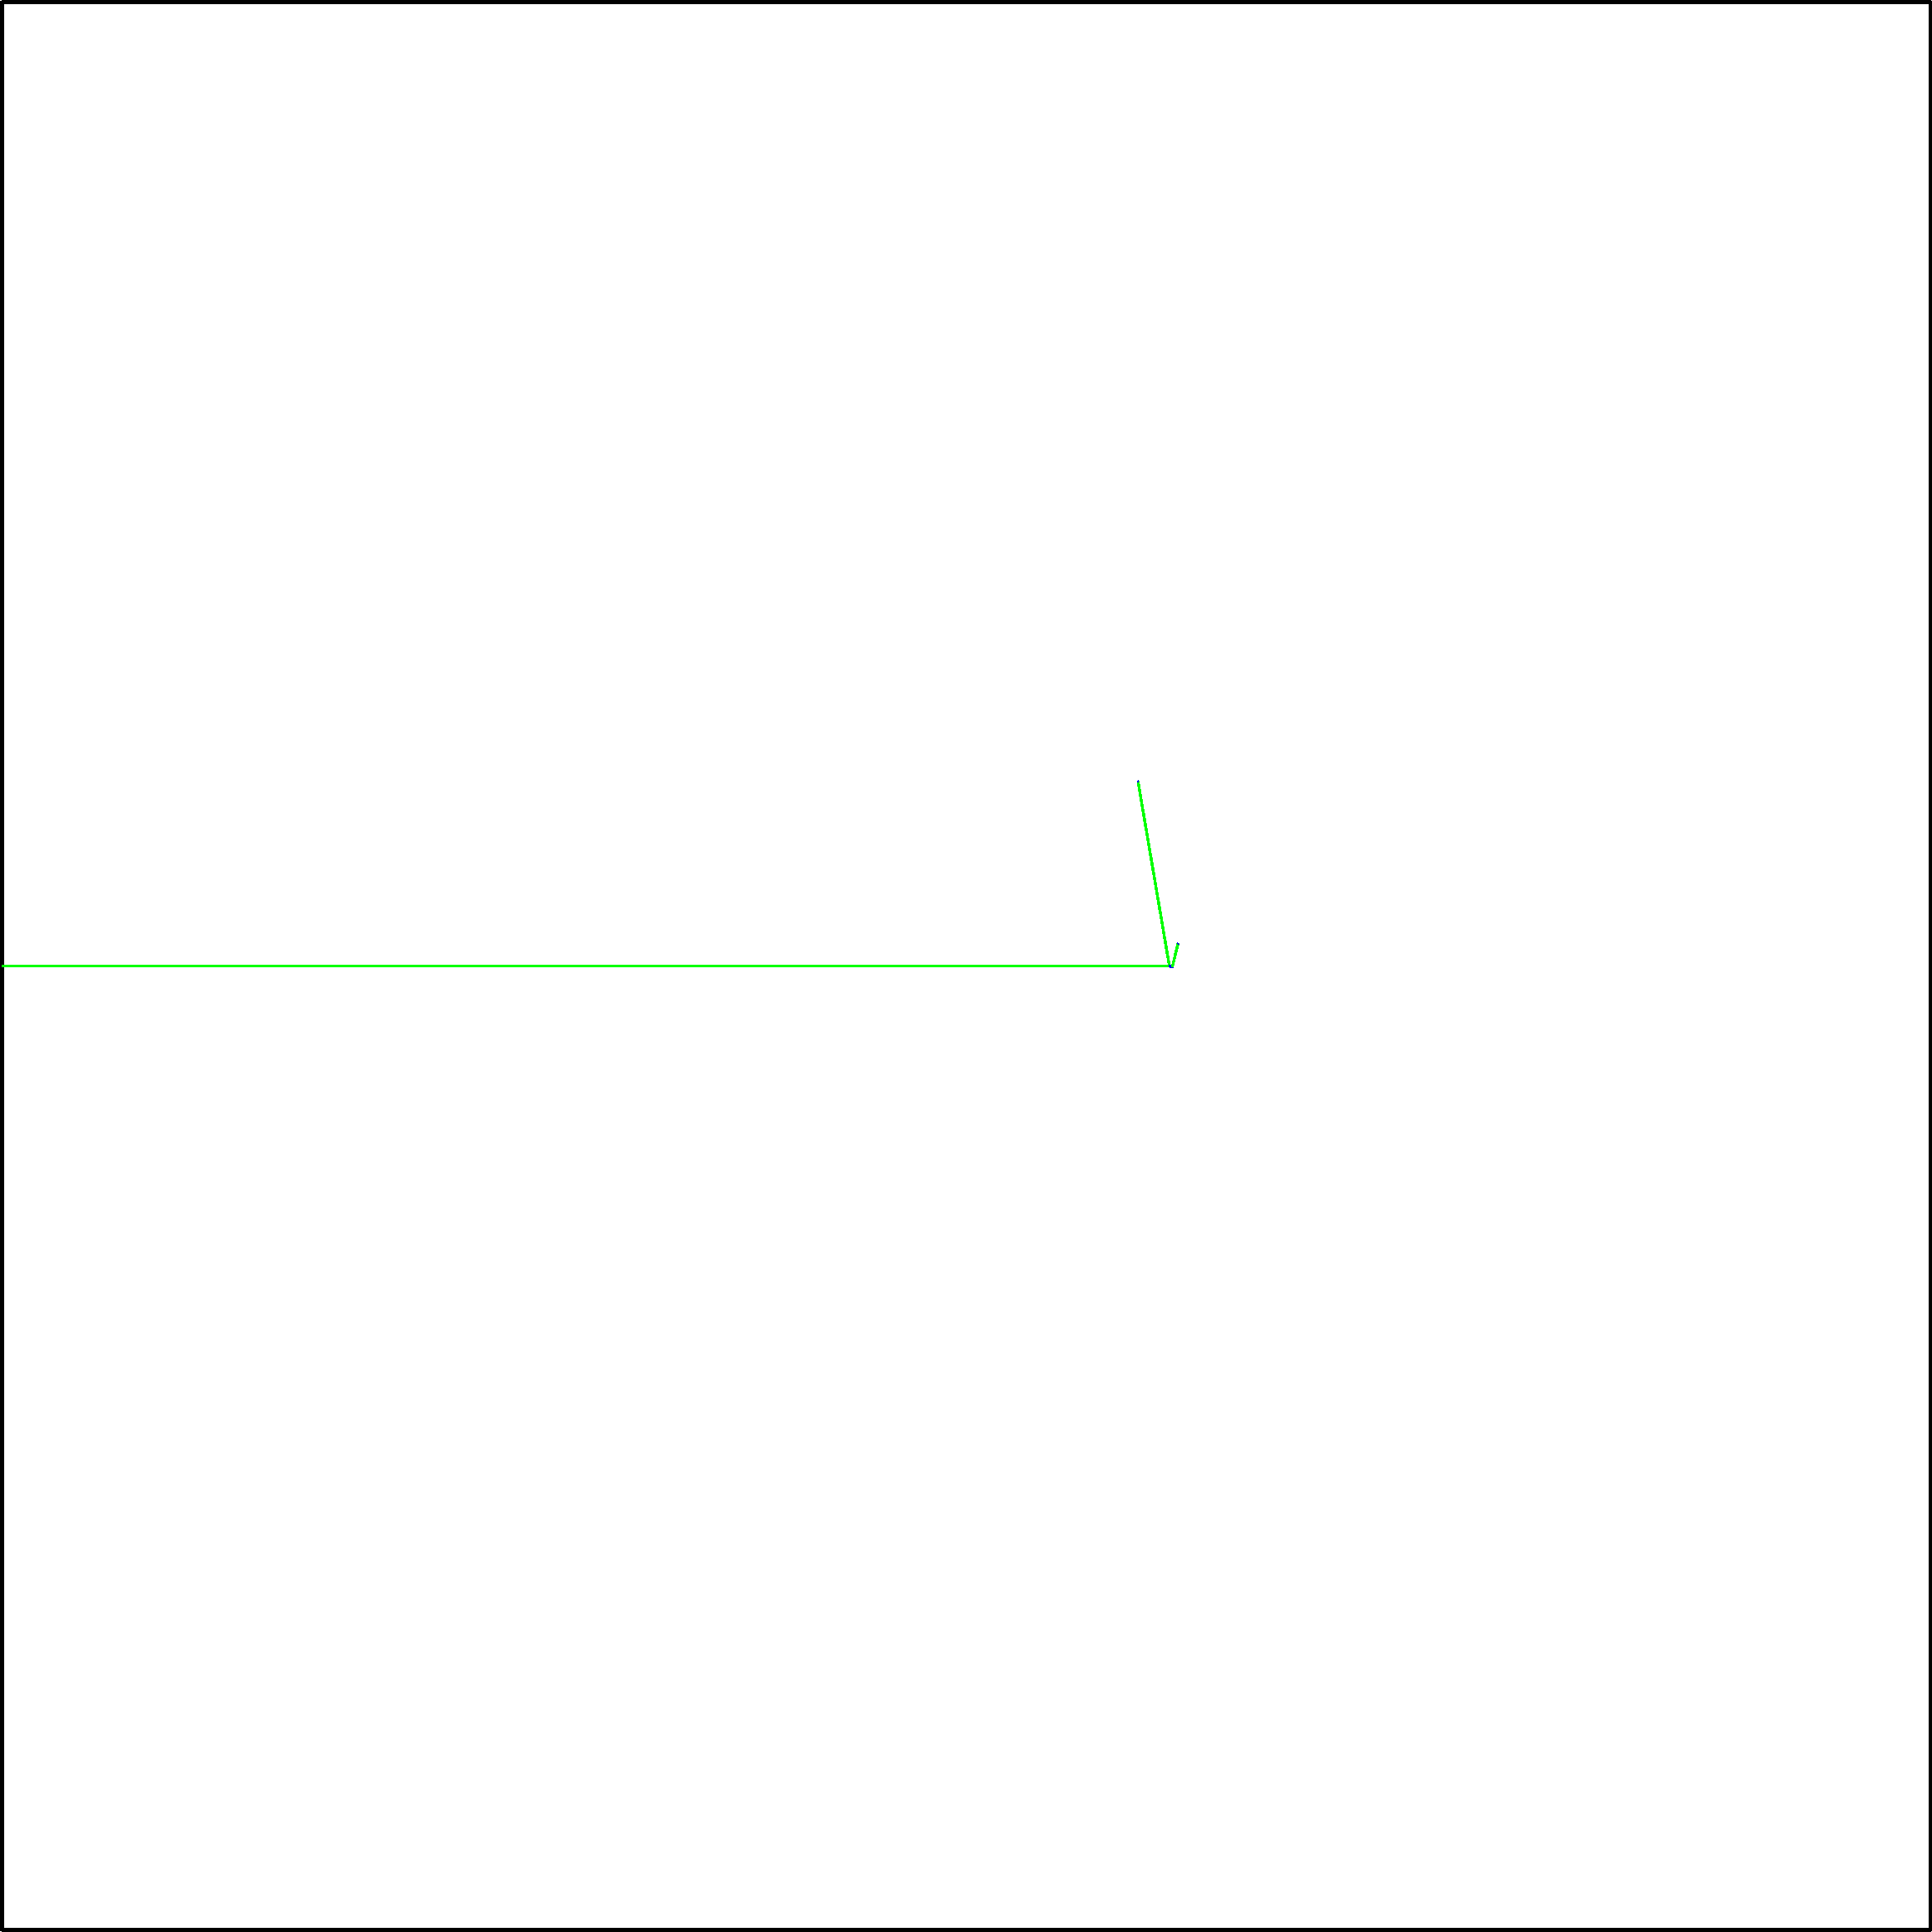

Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


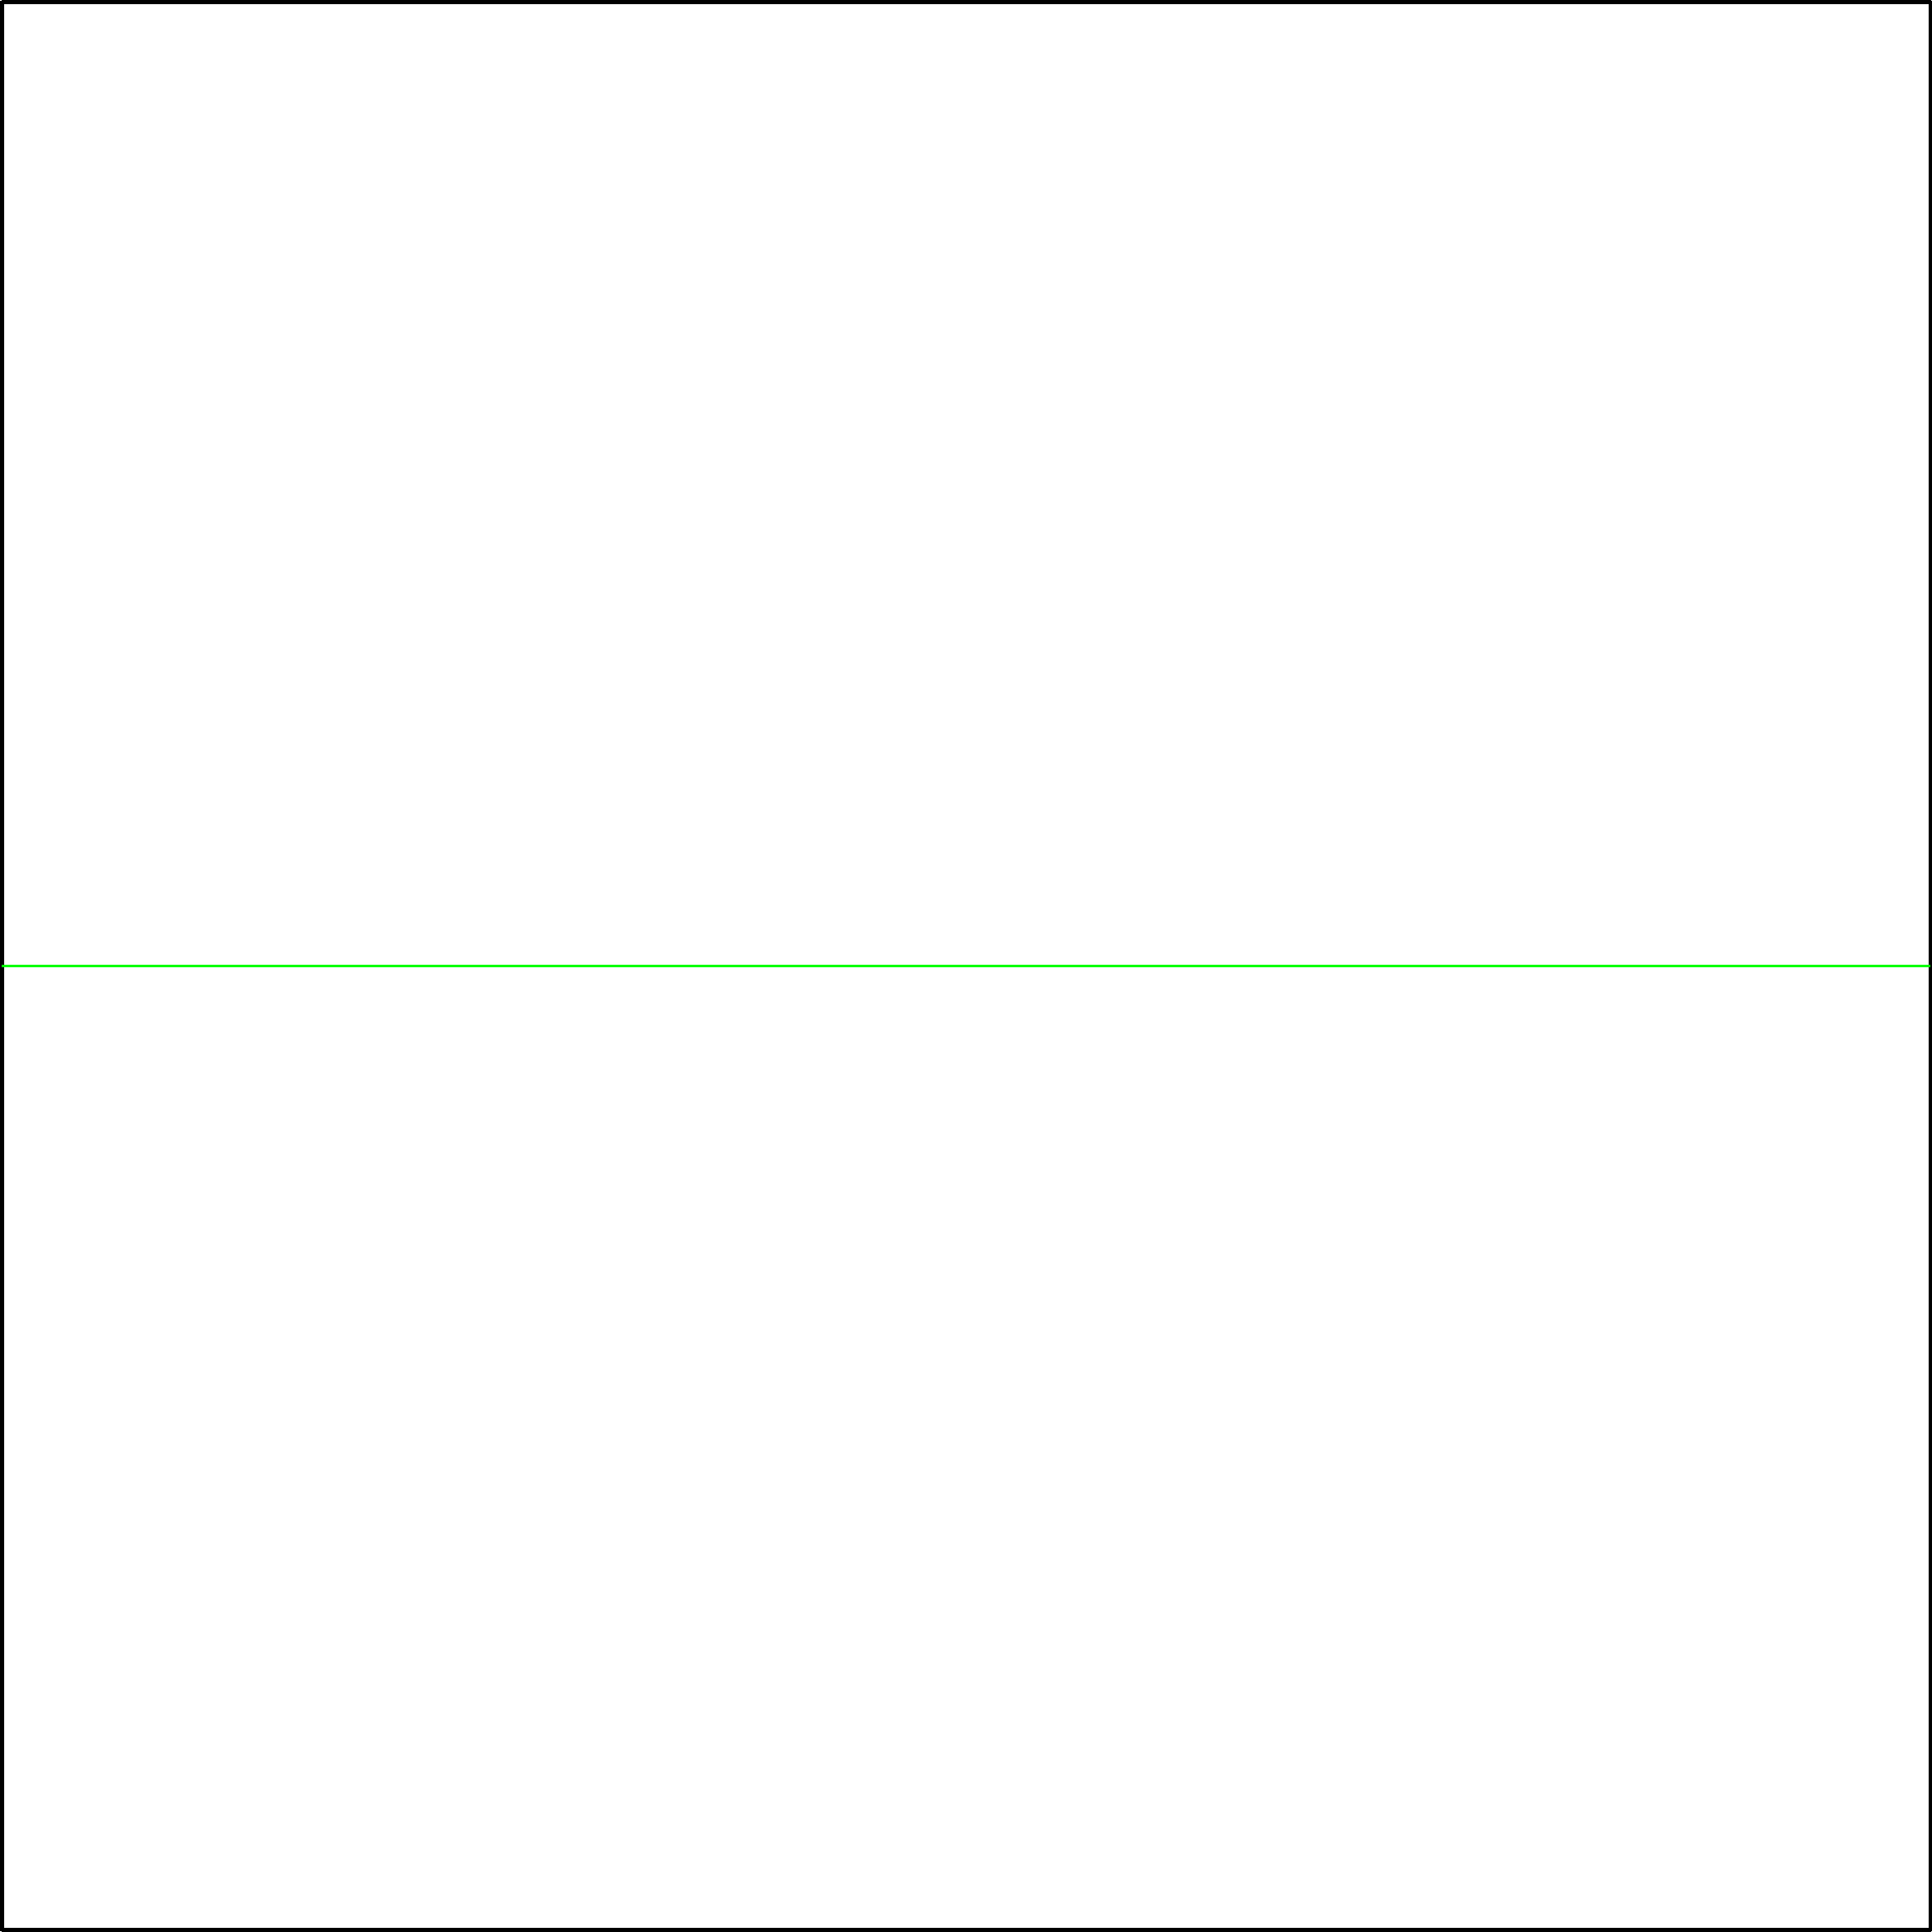

Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


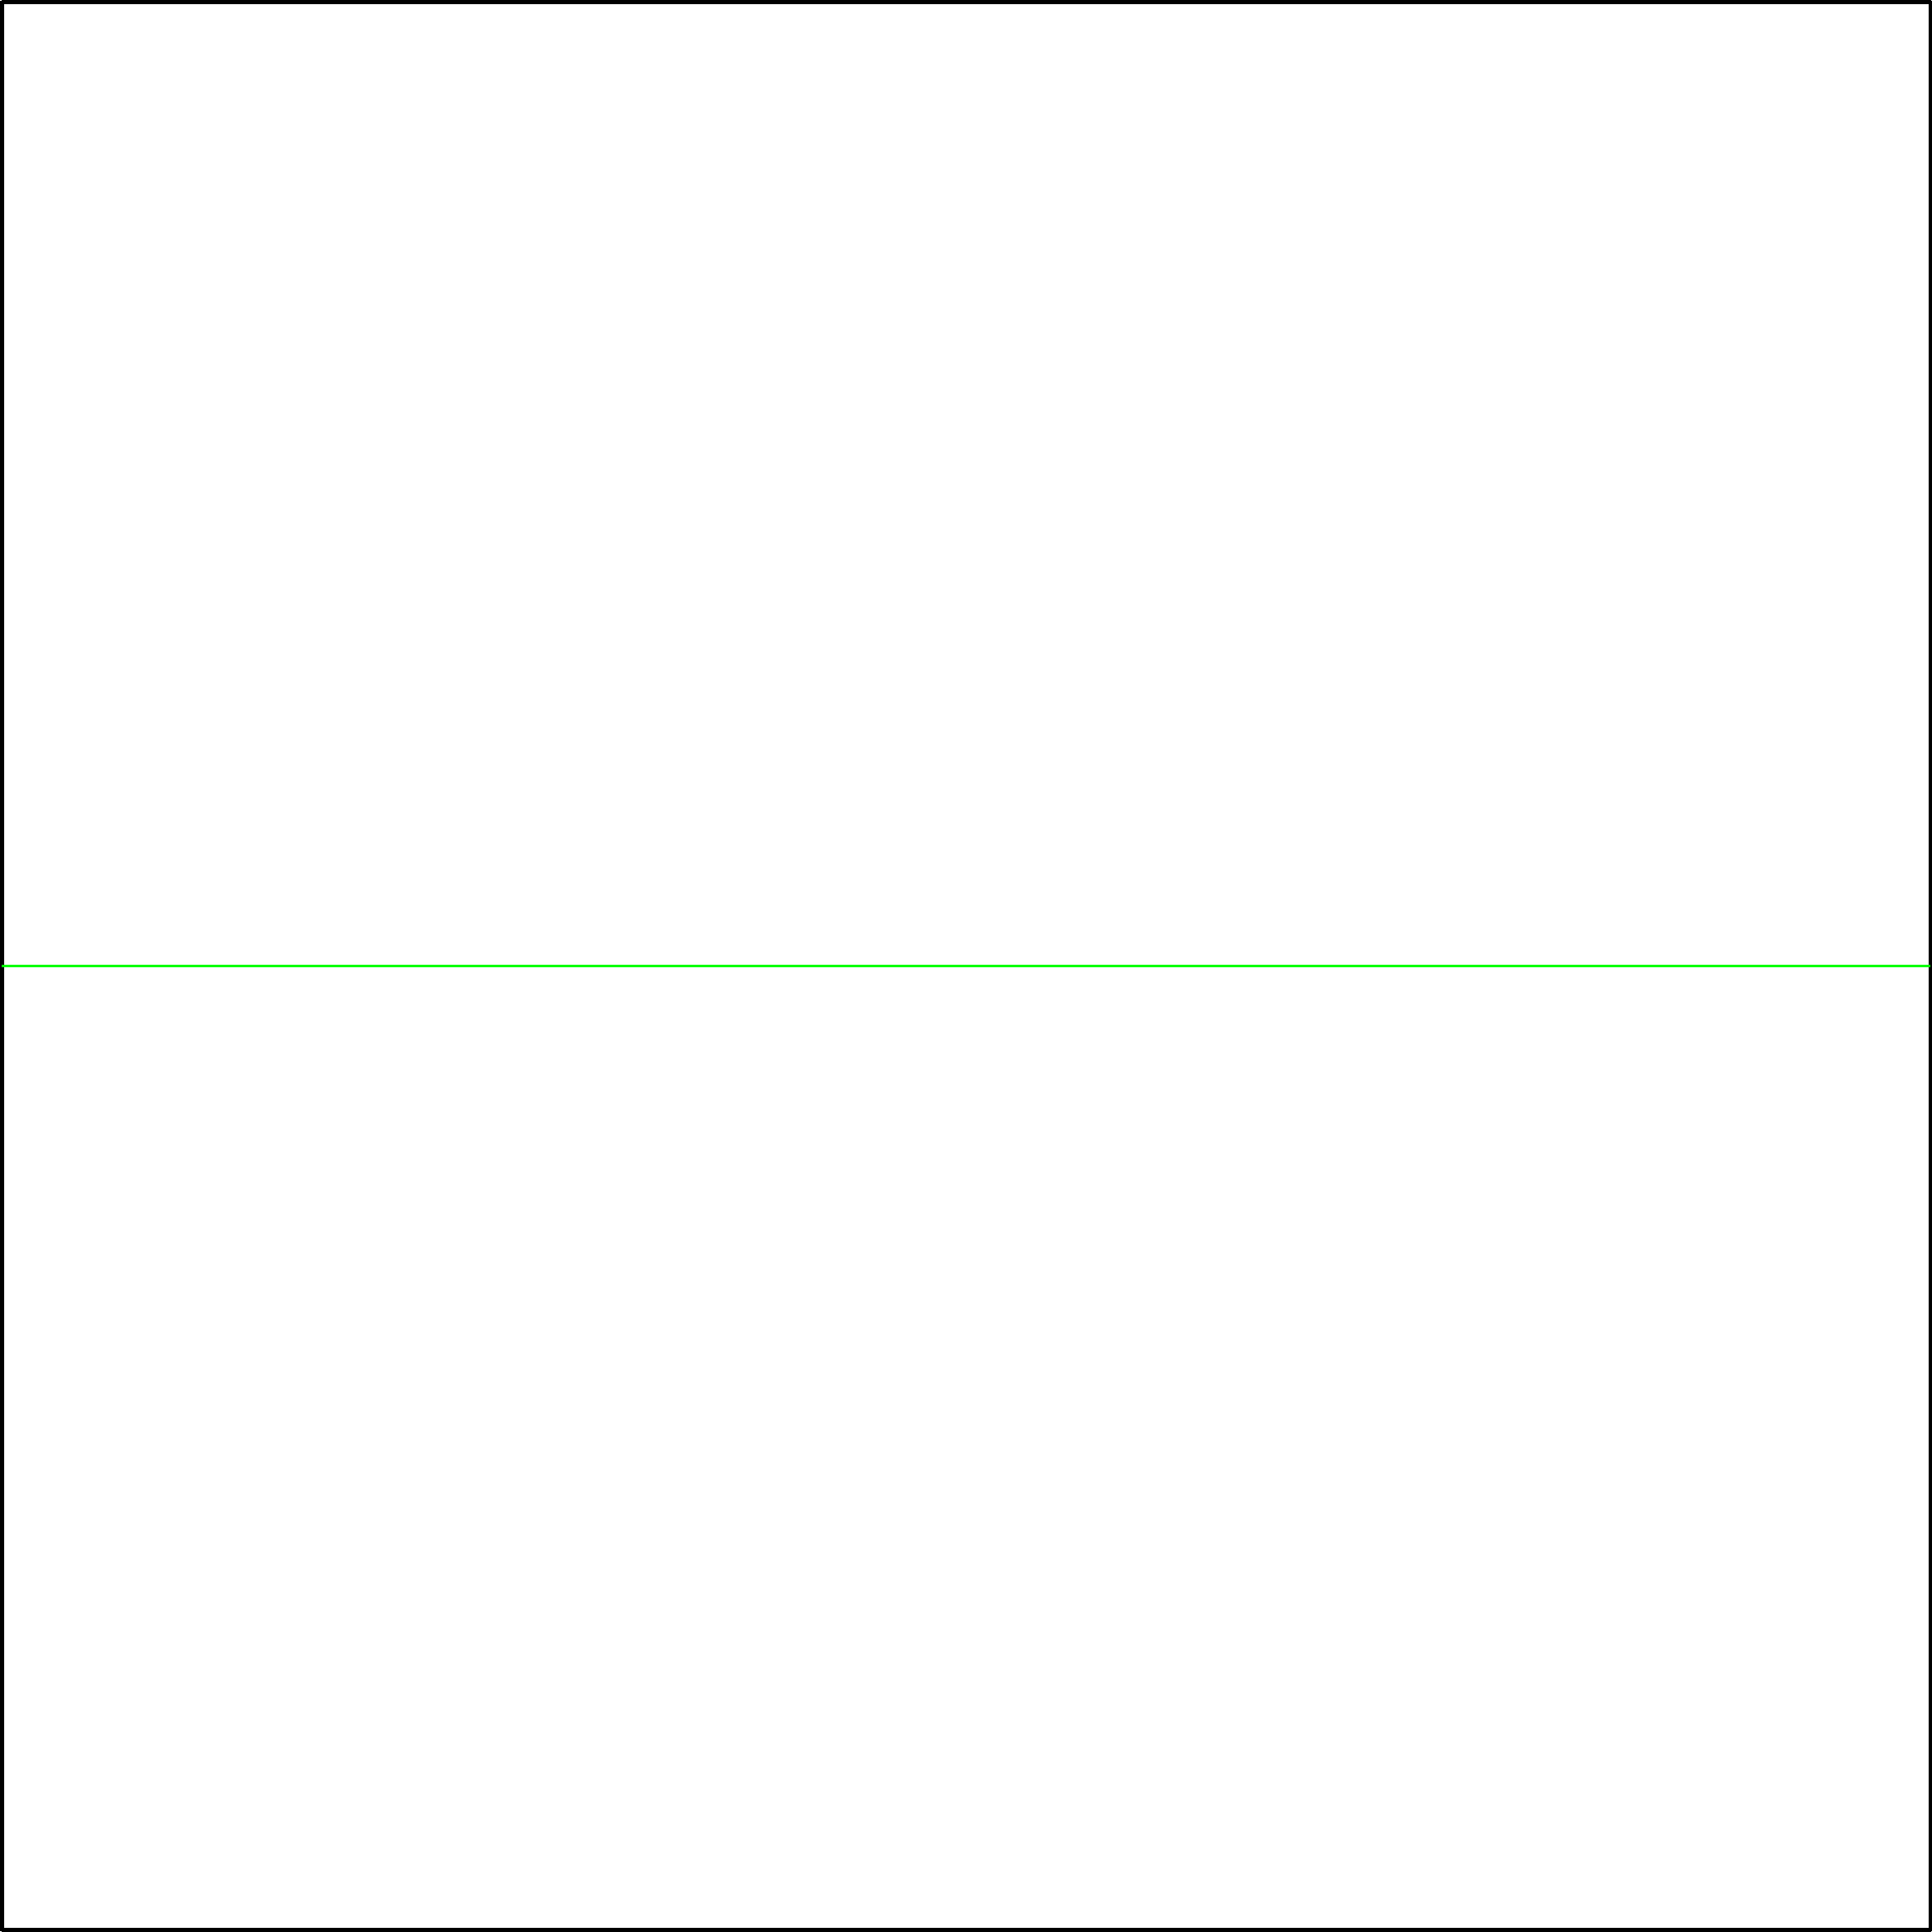

Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


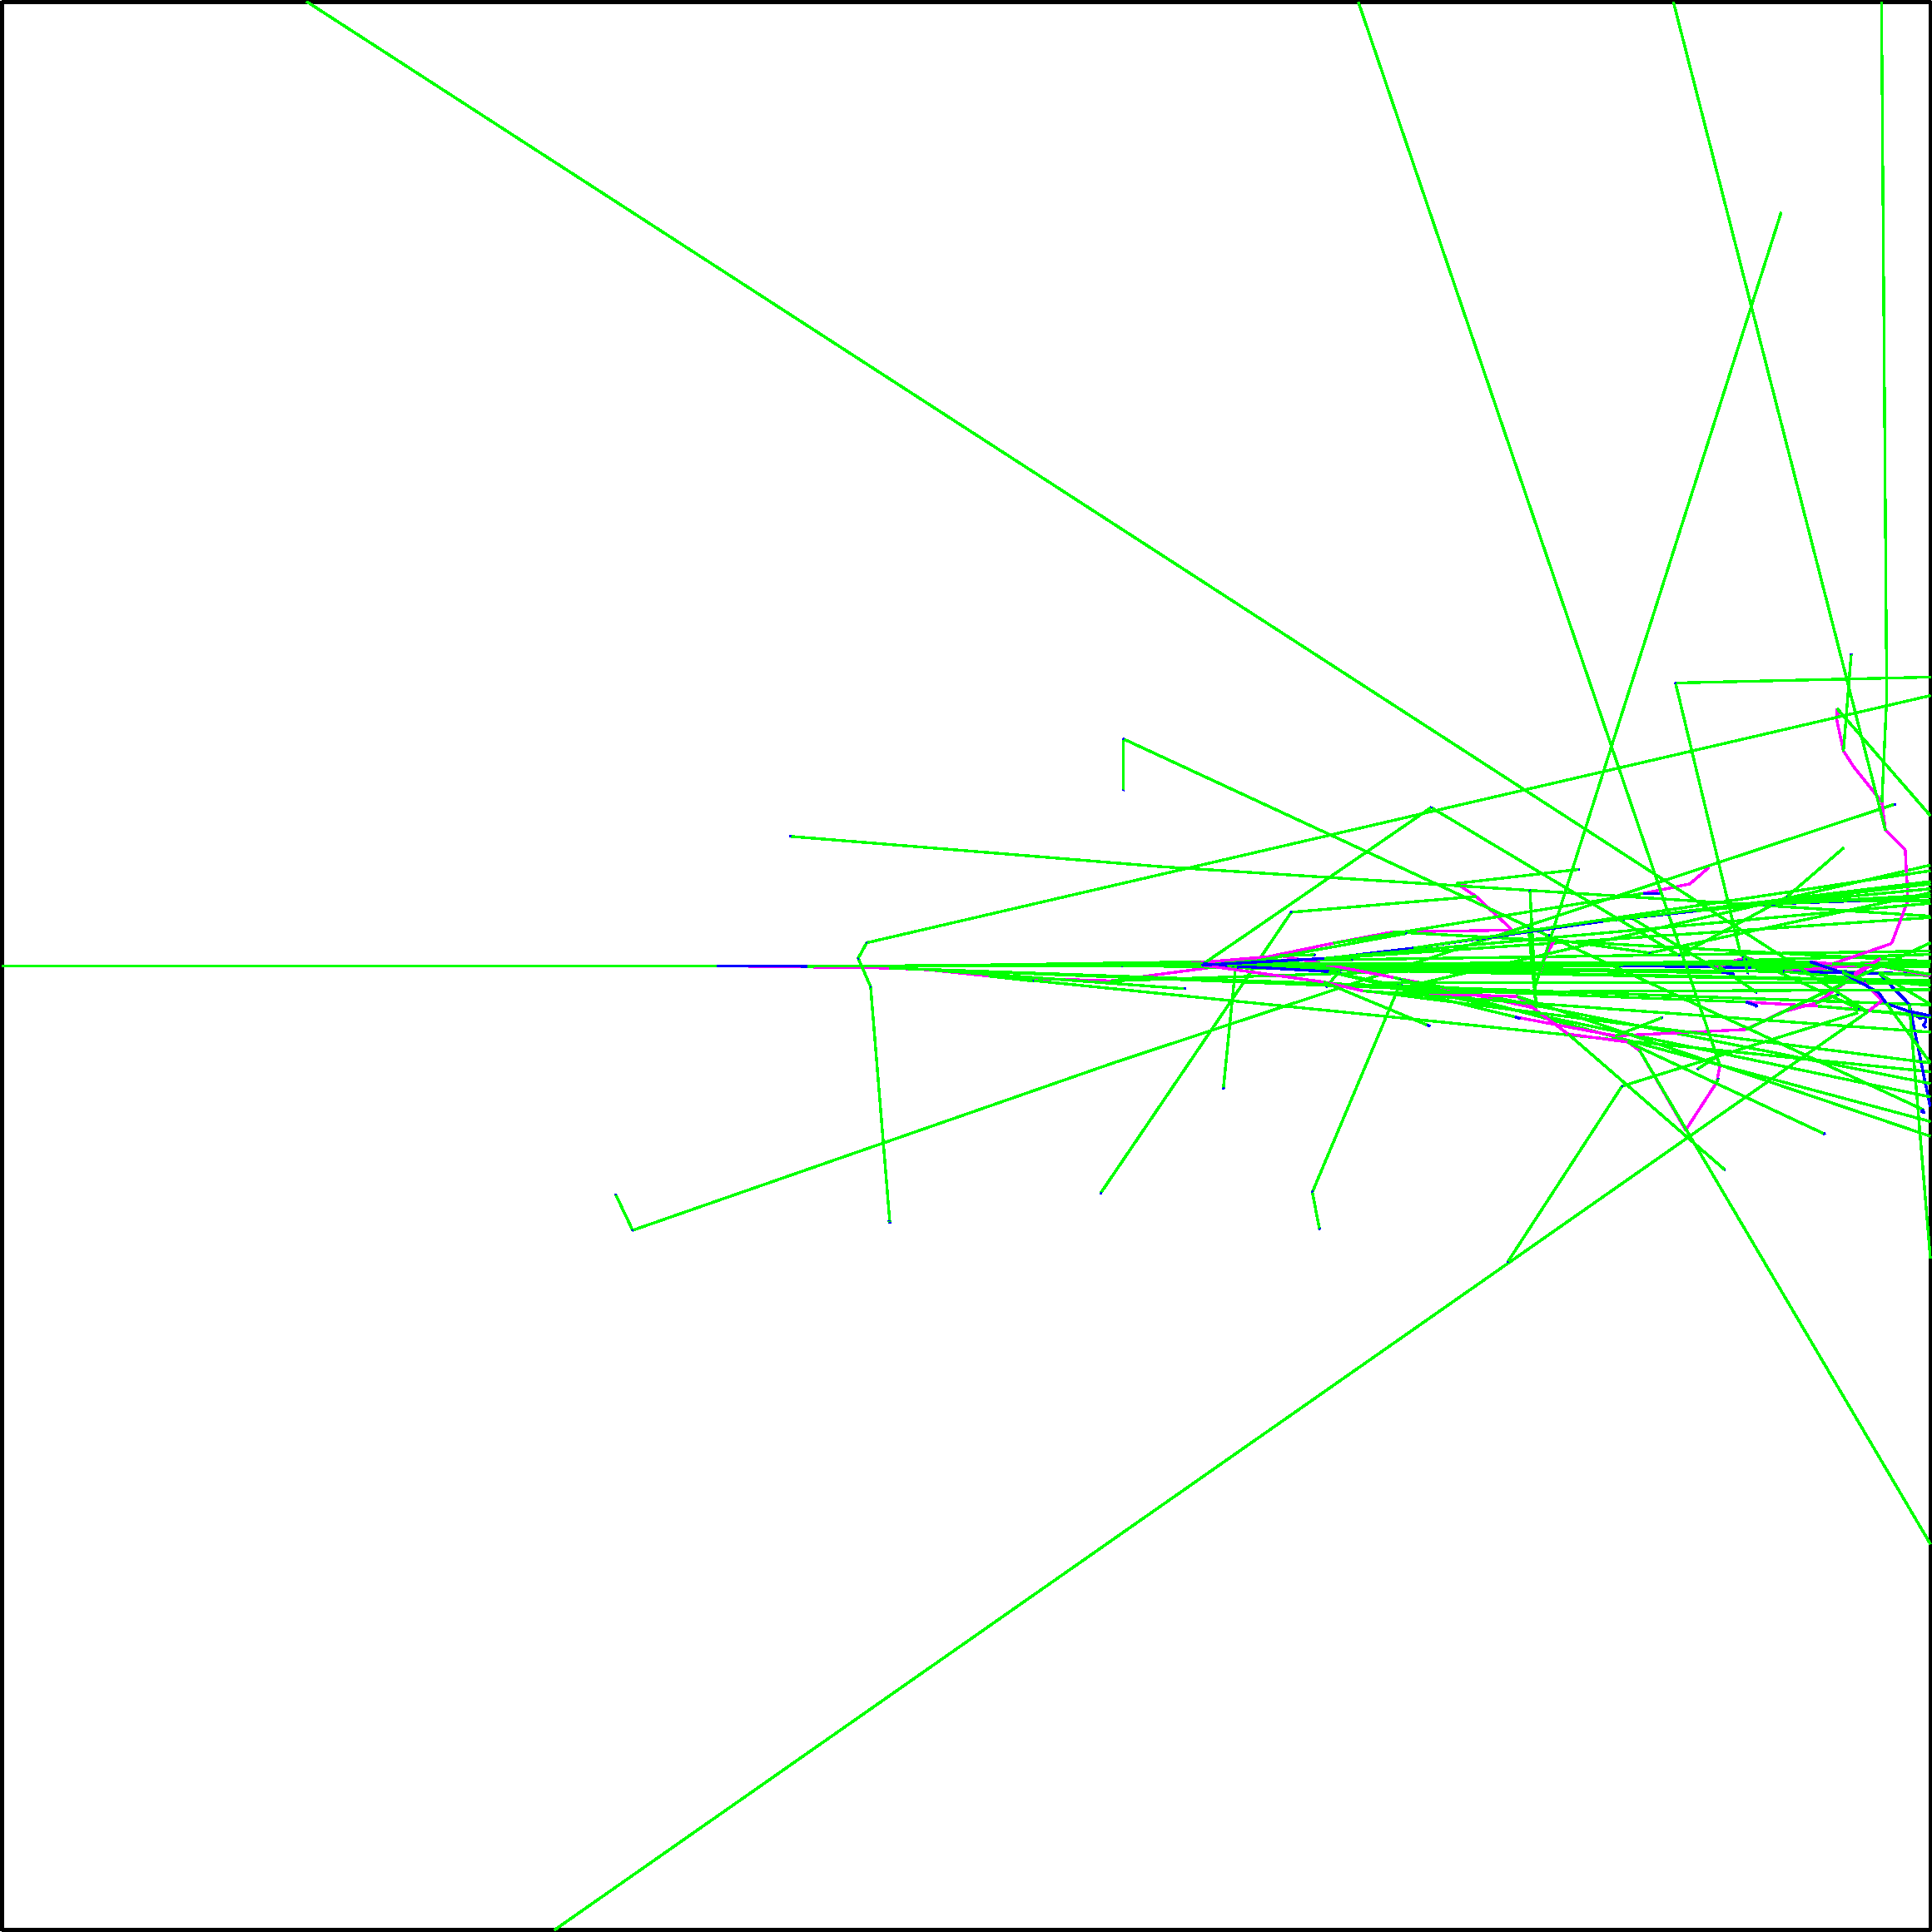

Output file: g4_0000.prim
Destination directory (current dir if NULL): 
Maximal number of files in the destination directory: 1
Note:                                                
  * The maximal number is customizable as:           
       % setenv  G4DAWNFILE_MAX_FILE_NUM  number 
  * The destination directory is customizable as:
       % setenv  G4DAWNFILE_DEST_DIR  dir_name/  
     ** Do not forget "/" at the end of the    
        dir_name, e.g. "./tmp/".  

File  g4_0000.prim  is generated.
No viewer is invoked.


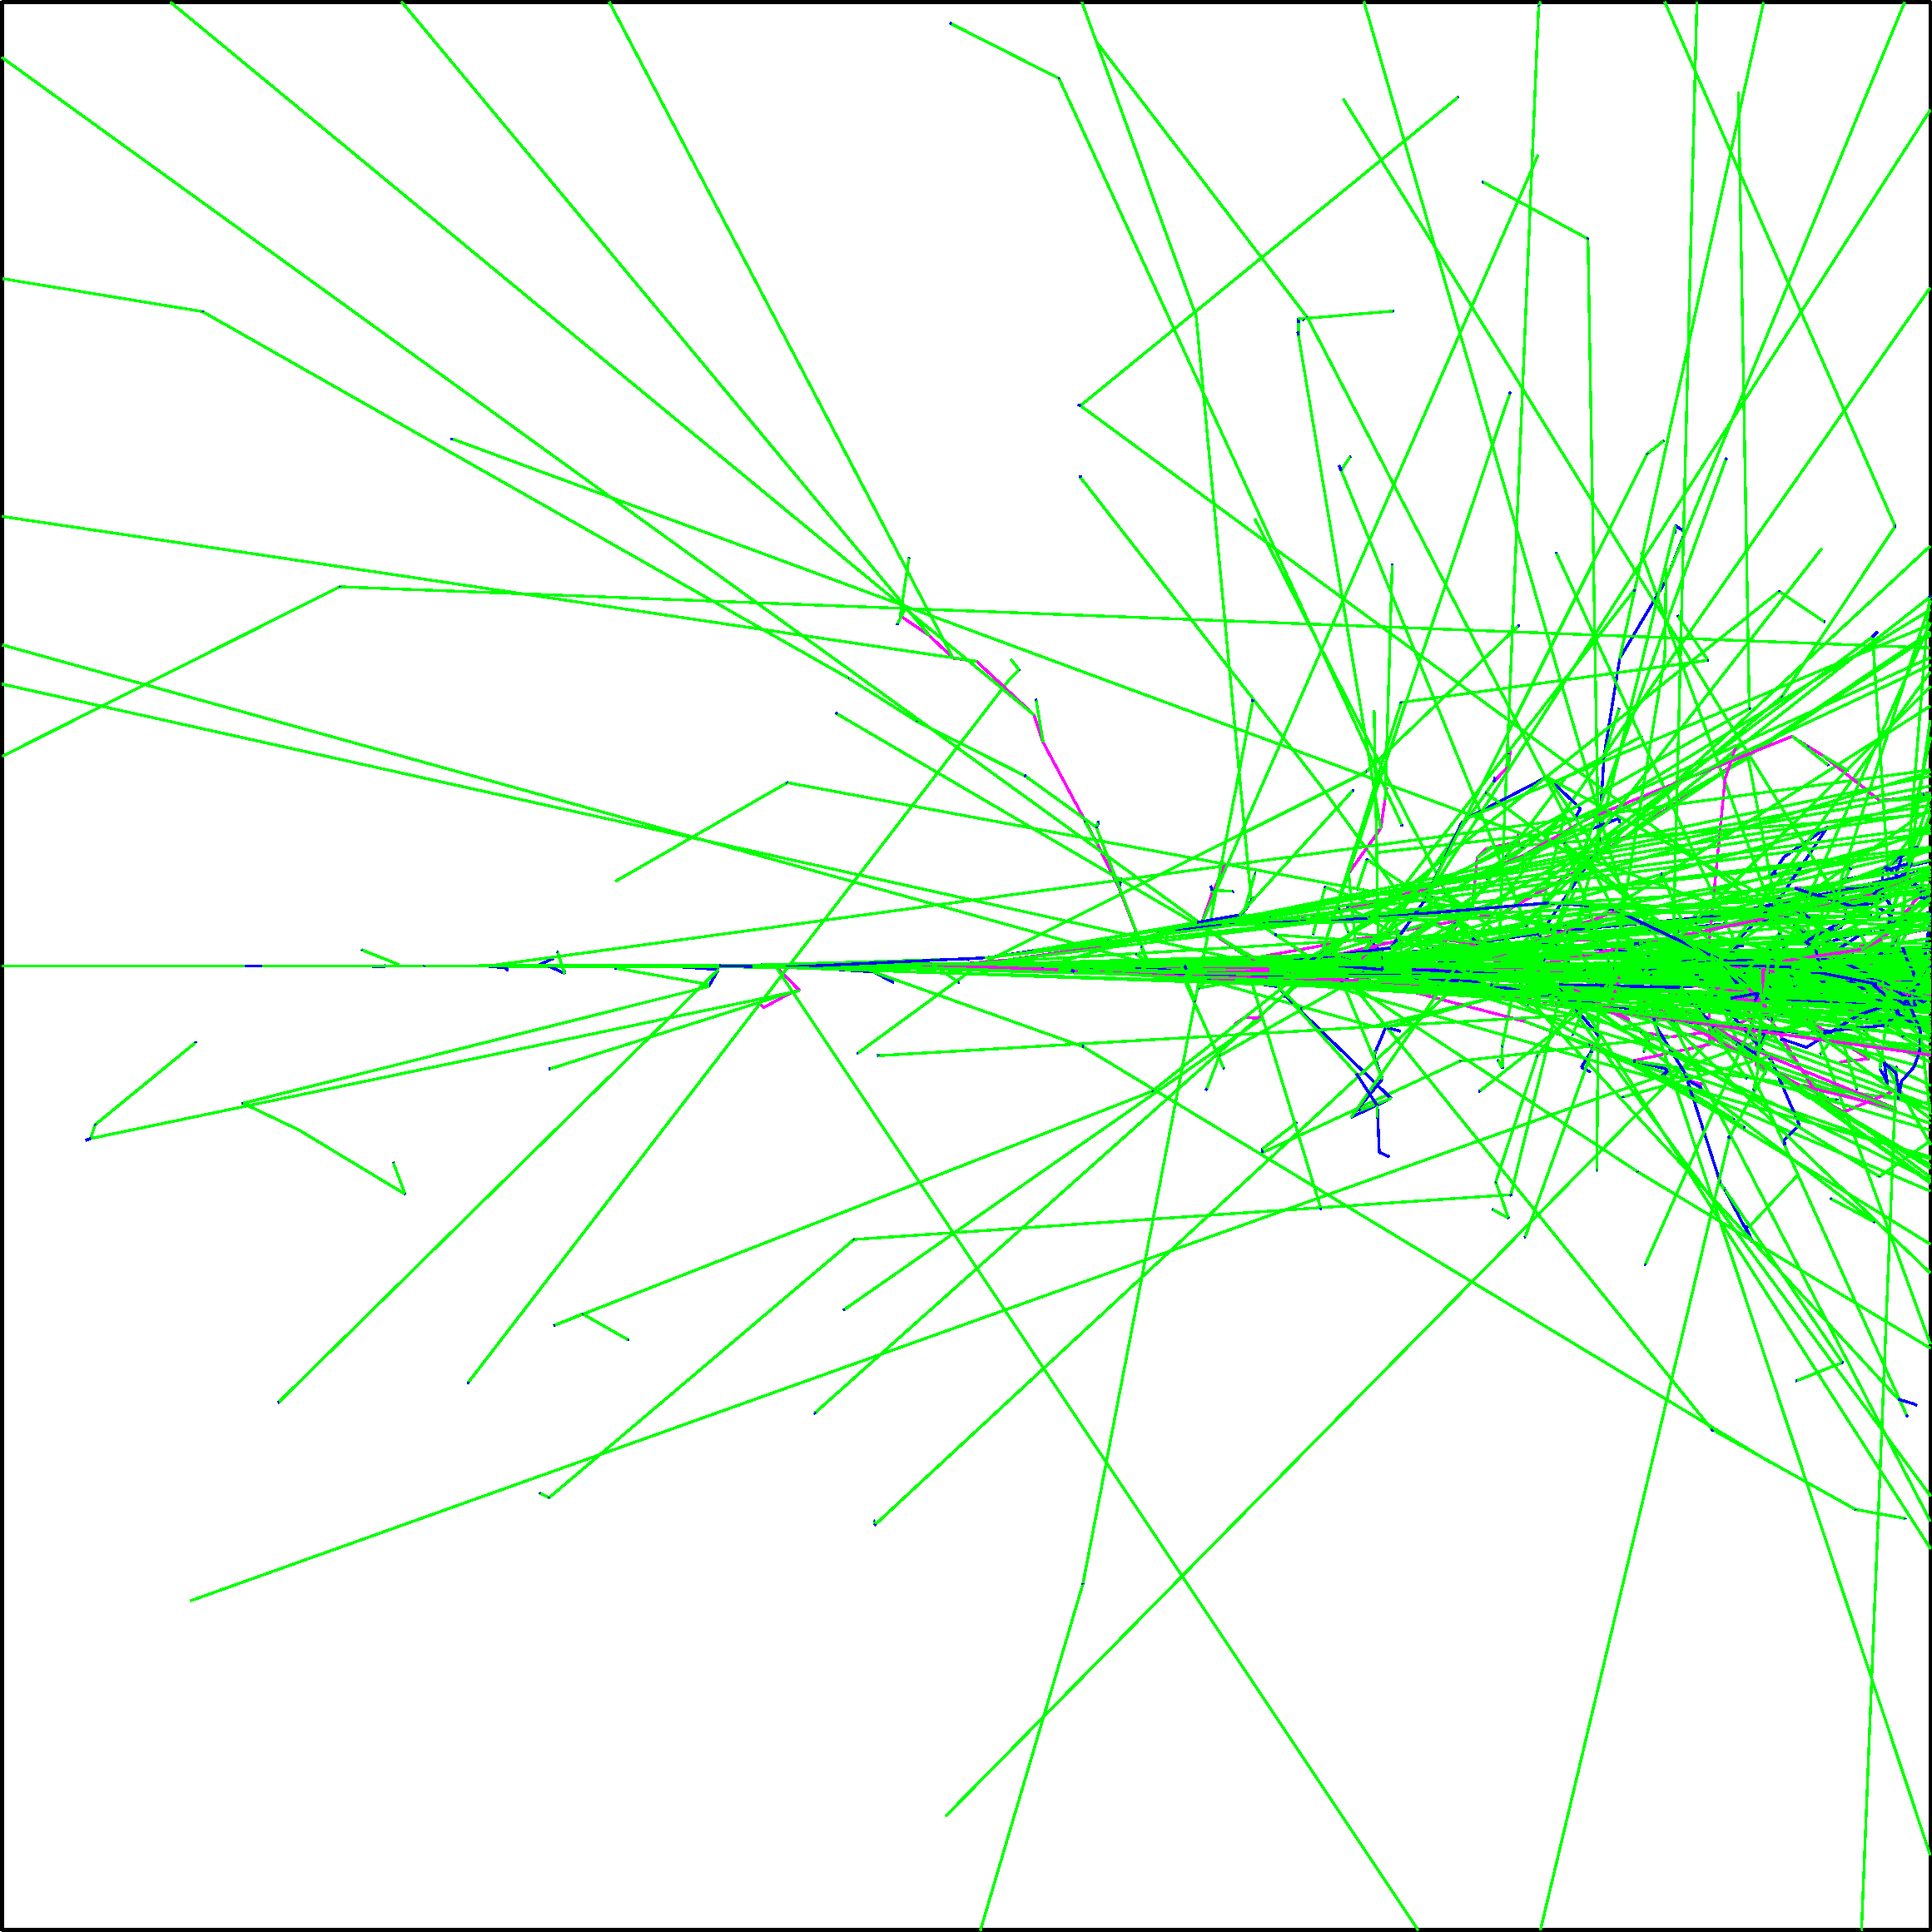

In [7]:
g4.set_particle(22) # 22 = photon
g4.set_energy(0.001)  # 1 MeV initial energy.
g4.start_run(visualize=True)

g4.set_particle(22) # 22 = photon
g4.set_energy(0.01)  # 10 MeV initial energy.
g4.start_run(visualize=True)

g4.set_particle(22) # 22 = photon
g4.set_energy(0.1)  # 100 MeV initial energy.
g4.start_run(visualize=True)

g4.set_particle(22) # 22 = photon
g4.set_energy(1)  # 1 GeV initial energy.
g4.start_run(visualize=True)

g4.set_particle(22) # 22 = photon
g4.set_energy(10)  # 10 GeV initial energy.
g4.start_run(visualize=True)